##### Use the iris dataset.

- Perform clustering with sepal length, sepal width, and petal length.
- Use a k of 4.
- Create a 3d visualization that shows your clusters along with the features specified above?
- Is 4 the optimal number? Try different values of k and visualize your results.

In [84]:
from pydataset import data

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle_mall

import warnings
warnings.filterwarnings("ignore")

In [85]:
df_iris = data("iris")

In [86]:
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [87]:
iris = df_iris.rename(columns={"Sepal.Length":"sepal_length", "Sepal.Width":"sepal_width",
                             "Petal.Length":"petal_length","Petal.Width":"petal_width","Species":"species"})

In [88]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [89]:
iris = df[["sepal_length","sepal_width","petal_length"]]
iris.head()

,sepal_length,sepal_width,petal_length
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4


In [90]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(iris)
kmeans.predict(iris)

array([5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 0, 4, 0, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 0, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 4, 4, 0, 0, 3, 3, 4, 0, 4, 3, 4, 0, 3, 4, 4, 0, 3, 3, 3,
       0, 4, 0, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4], dtype=int32)

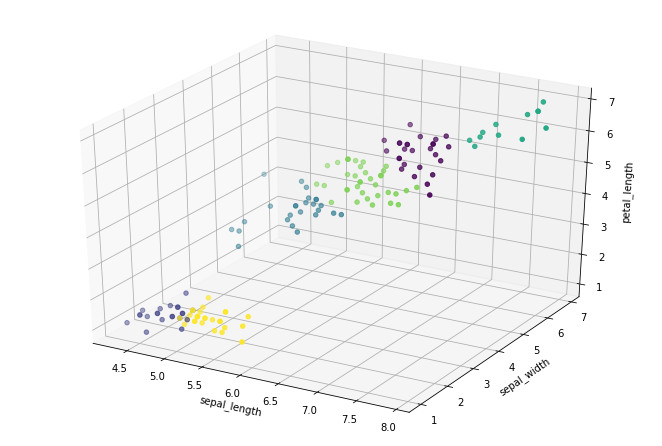

In [91]:
fig = plt.figure(figsize=(9, 6))
ax = Axes3D(fig)

ax.scatter(iris.sepal_length, iris.petal_length, iris.petal_length, c=kmeans.labels_)
ax.set(xlabel='sepal_length', ylabel='sepal_width', zlabel='petal_length')
plt.show()

##### Use the mall dataset.

- Perform clustering using annual income and spending score. Try out different values for k.
- Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual income and spending score? What is the average age for each cluster?
- Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created.

In [92]:
df_mall = wrangle_mall.wrangle()

In [93]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [94]:
mall = df_mall[["annual_income","spending_score"]]
mall.head()

,annual_income,spending_score
customer_id,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [95]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(mall)
kmeans.predict(mall)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [96]:
kmeans.cluster_centers_

array([[48.26      , 56.48      ],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [97]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=mall.columns)
centers

,annual_income,spending_score
0,48.260000,56.480000
1,87.000000,18.631579
2,86.538462,82.128205
3,26.304348,20.913043


TypeError: 'str' object is not callable

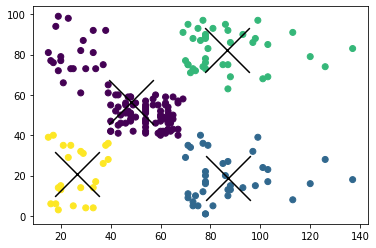

In [105]:
plt.scatter(mall.annual_income, mall.spending_score, c=kmeans.labels_)
plt.scatter(centers.annual_income, centers.spending_score, marker='x', s=2000, c="black")

plt.xlabel("annual income")
plt.ylabel("spending score")

plt.show()

In [62]:
df_mall["clusters"] = kmeans.labels_
df_mall.head()

,gender,age,annual_income,spending_score,clusters
customer_id,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2


In [64]:
df_mall.groupby("clusters").age.mean()

clusters
0    40.394737
1    32.692308
2    45.217391
3    39.200000
Name: age, dtype: float64